In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fourier Transform
Fourier Transform is used to decompose an image into its sine and cosine components. The output of the transformation represents the image in the Fourier or frequency domain, while the input image is the spatial domain equivalent. In the Fourier domain image, each point represents a particular frequency contained in the spatial domain image. It's used for image filtering, compression etc.

We mostly use <b>DFT</b> (Discrete Fourier Transform), which is sample fourier transform and thus, doesn't contain all the frequencies, but only a set of samples which is large enough to describe the spatial domain information.

For an image of nxm dimensions, 2-D DFT is given by
$$F(k, l) = \sum_{i=0}^{n-1}\sum_{j=0}^{m-1}f(i, j)e^{-i2\pi(\frac{ki}{n} + \frac{lj}{m})}$$

Inverse transform is given by
$$f(a, b) = \frac{1}{n*m}\sum_{k=0}^{n-1}\sum_{l=0}^{m-1}F(k, l)e^{i2\pi(\frac{ka}{n} + \frac{lb}{m})}$$

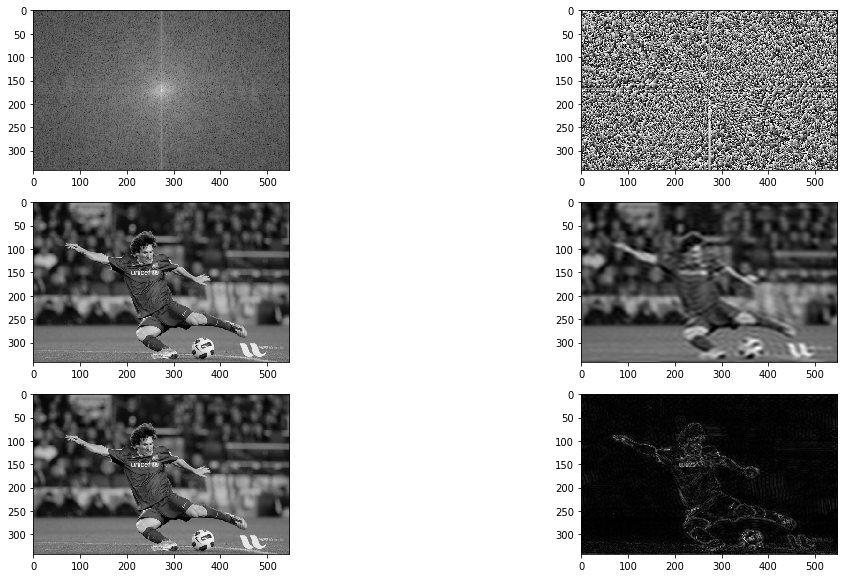

In [38]:
image = cv2.imread("../resources/messi.jpg", cv2.IMREAD_GRAYSCALE)

fig = plt.figure()
fig.set_size_inches(18, 10)

dft = np.fft.fftshift(cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT))
# magnitude_spectrum = 20*np.log(cv2.magnitude(dft[:,:,0], dft[:,:,1]))
# phase_spectrum = cv2.phase(dft[:,:,0], dft[:,:,1])
magnitude_spectrum, phase_spectrum = cv2.cartToPolar(dft[:,:,0], dft[:,:,1])
magnitude_spectrum = 20*np.log(magnitude_spectrum)

fig.add_subplot(3, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
fig.add_subplot(3, 2, 2)
plt.imshow(phase_spectrum, cmap='gray')

# Applying Low Pass Filter => Removes high frequencies (noise)
rows, cols = image.shape
center = rows/2, cols/2
mask = np.zeros((rows, cols, 2), np.uint8)
# low pass filter => 1 at low frequency and 0 at high frequency
mask[center[0] - 30:center[0] + 30, center[1] - 30:center[1] + 30] = 1

filtered = dft*mask
inv = cv2.idft(np.fft.ifftshift(filtered))
inv_mag = cv2.magnitude(inv[:,:,0], inv[:,:,1])
fig.add_subplot(3, 2, 3)
plt.imshow(image, cmap='gray')
fig.add_subplot(3, 2, 4)
plt.imshow(inv_mag, cmap='gray')

# Applying high pass filter
dft[center[0] - 30:center[0] + 30, center[1] - 30:center[1] + 30] = 0
inv = cv2.idft(np.fft.ifftshift(dft))
inv_mag = cv2.magnitude(inv[:,:,0], inv[:,:,1])
fig.add_subplot(3, 2, 5)
plt.imshow(image, cmap='gray')
fig.add_subplot(3, 2, 6)
plt.imshow(inv_mag, cmap='gray')

plt.show()

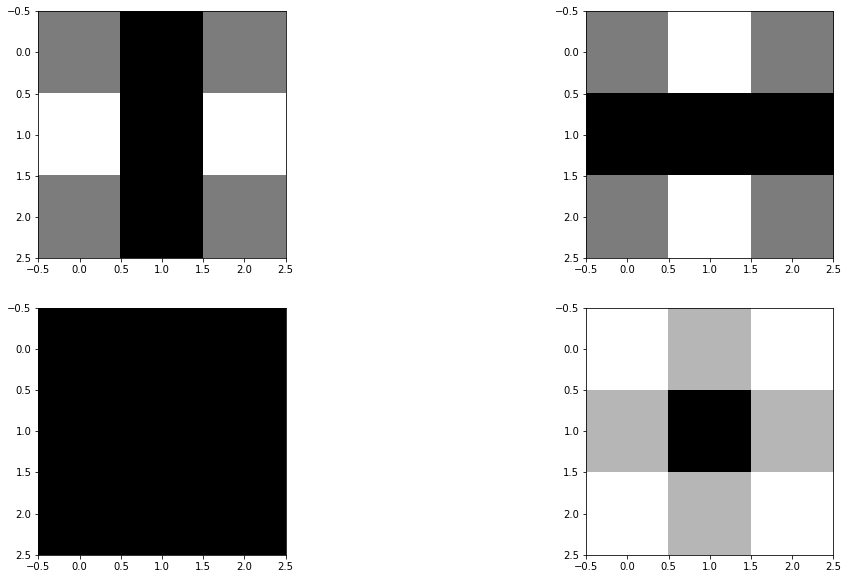

In [56]:
# Representation of some important kernels

gauss = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

fig = plt.figure()
fig.set_size_inches(18, 10)

kernels = [sobel_x, sobel_y, gauss, laplacian]
for i in range(4):
    dft = np.fft.fftshift(cv2.dft(np.float32(kernels[i]), flags=cv2.DFT_COMPLEX_OUTPUT))
    magnitude = np.log(cv2.magnitude(dft[:,:,0], dft[:,:,1]) + 1)
    fig.add_subplot(2, 2, i+1)
    plt.imshow(magnitude, cmap='gray')

plt.show()

## Applications of Fourier Transforms
1. Foresnic Image Analysis
<img src="../resources/fourier1.png">
2. Removing Fluctuations
<img src="../resources/fourier2.png">